   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
Epoch 1/15


359/359 [==============================] - 13s 34ms/step - loss: 2.1812 - accuracy: 0.2308 - val_loss: 1.7837 - val_accuracy: 0.2586
Epoch 2/15
359/359 [==============================] - 12s 33ms/step - loss: 1.7873 - accuracy: 0.2622 - val_loss: 1.7164 - val_accuracy: 0.3079
Epoch 3/15
359/359 [==============================] - 12s 33ms/step - loss: 1.6947 - accuracy: 0.3192 - val_loss: 1.5687 - val_accuracy: 0.3932
Epoch 4/15
359/359 [==============================] - 12s 33ms/step - loss: 1.6007 - accuracy: 0.3683 - val_loss: 1.4983 - val_accurac

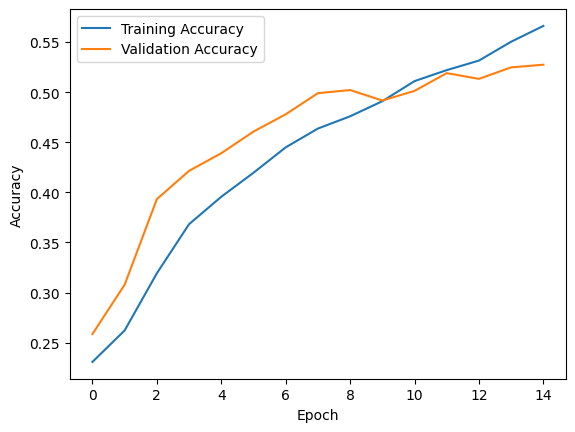

225/225 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.45      0.41      0.43       985
           1       0.82      0.09      0.16       102
           2       0.41      0.15      0.23      1043
           3       0.66      0.82      0.73      1765
           4       0.34      0.56      0.42      1210
           5       0.77      0.58      0.66       795
           6       0.51      0.44      0.47      1278

    accuracy                           0.52      7178
   macro avg       0.57      0.43      0.44      7178
weighted avg       0.53      0.52      0.50      7178

[[ 402    0   42  131  277   17  116]
 [  30    9    7   11   41    1    3]
 [ 153    1  161  138  391   96  103]
 [  52    0   24 1445  144   14   86]
 [ 113    1   40  188  672    7  189]
 [  50    0   86   88   66  461   44]
 [  92    0   28  188  408    3  559]]


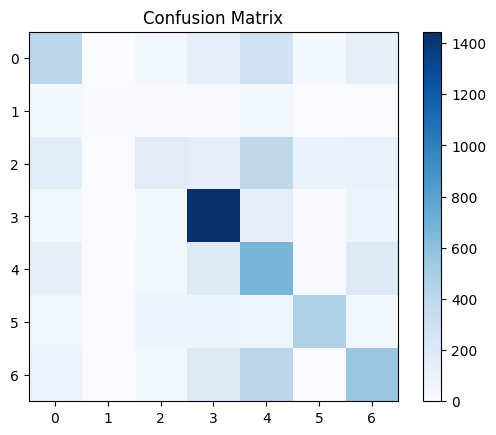

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the FER2013 CSV file
data = pd.read_csv("fer2013.csv")

# Display the first few rows of the dataset
print(data.head())

# Extract pixel values and labels
pixels = data['pixels'].values
labels = data['emotion'].values

# Convert pixel values to numpy arrays
pixels = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in pixels])
pixels = pixels.reshape(-1, 48, 48, 1)  # Reshape to 48x48 grayscale images

# Convert labels to one-hot encoding
labels = to_categorical(labels)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 classes for 7 emotions

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Display classification report and confusion matrix
print(classification_report(y_true_labels, y_pred_labels))
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print(conf_matrix)

# Visualize the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()
